demo-1.jpg


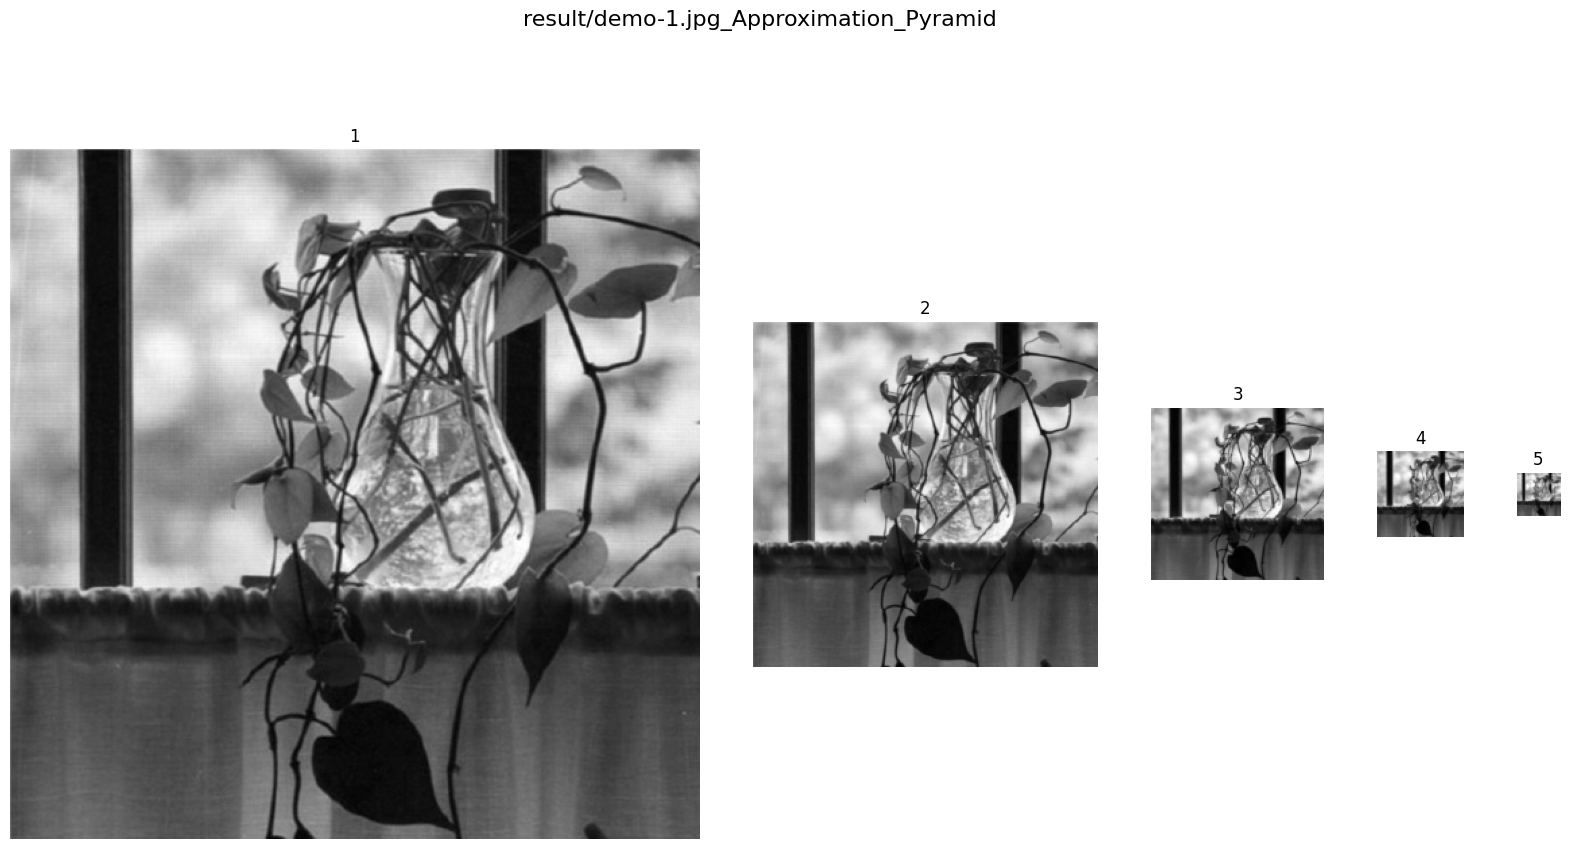

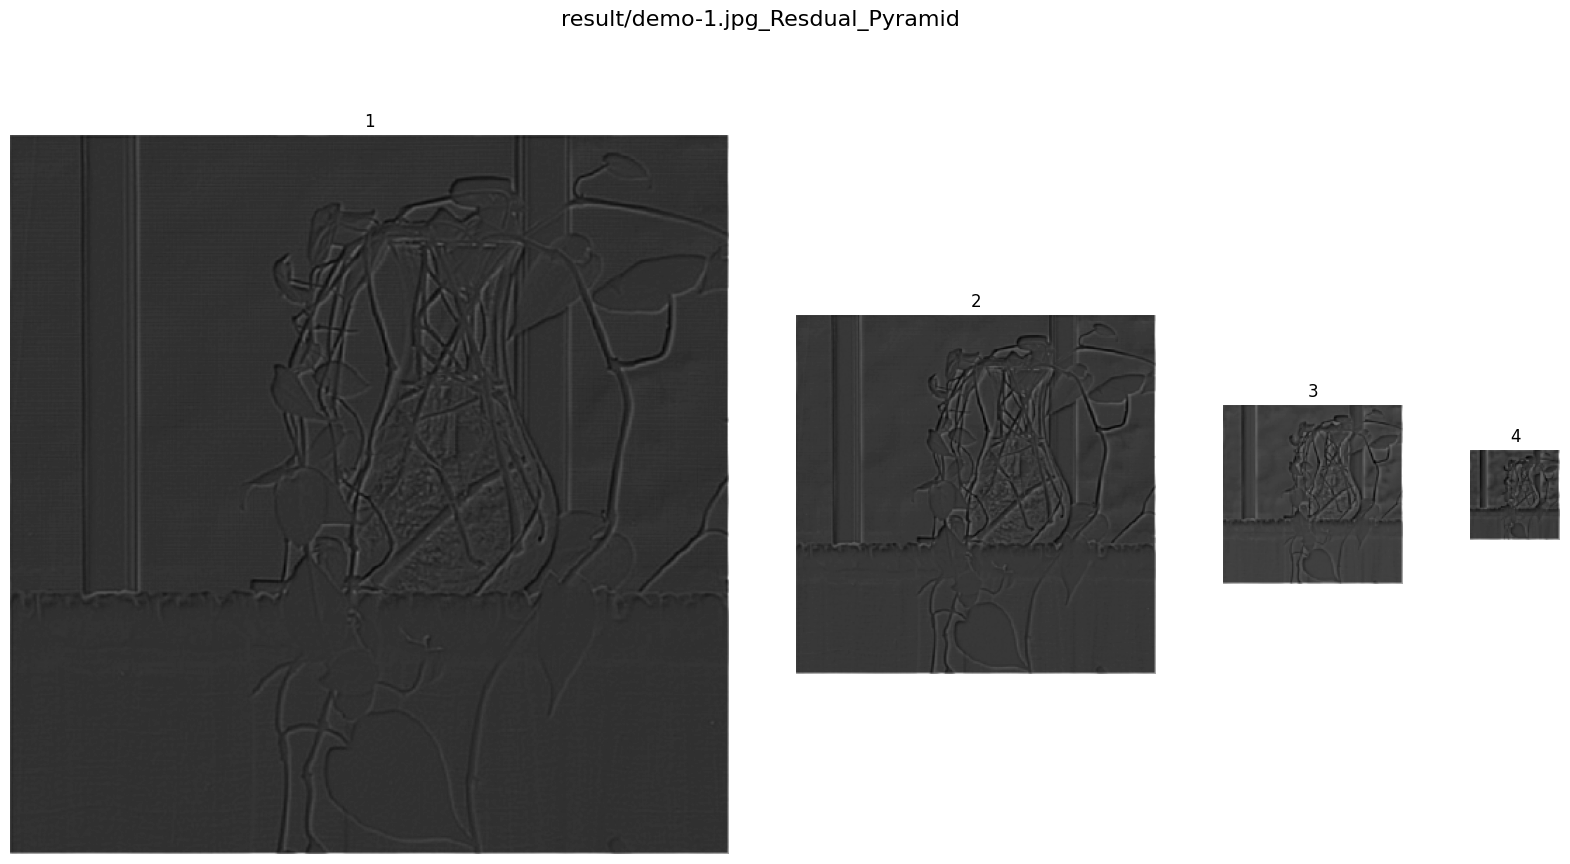

In [1]:
# 画图
import cv2
import os
import matplotlib.pyplot as plt
from function import(
    drawing,
    bilinear,
    downsample_image,
)

filenames = ['demo-1.jpg']

for filename in filenames:
    print(filename)

    image_approx = []
    image_residual = []

    # 读取图像
    input_image = cv2.imread(filename)[:, :, 0]  
    image_approx.append(input_image)
    for j in range(4):
        im_filtered = cv2.GaussianBlur(input_image, (3, 3), 0)
        im_downsample = downsample_image(im_filtered)
        # print(f'Image size: {im_downsample.shape}')
        image_approx.append(im_downsample)
        im_prediction = bilinear(im_downsample)
        image_residual.append(input_image - im_prediction)
        input_image = im_downsample

    drawing(image_approx, filename, 0)
    drawing(image_residual, filename,1)







demo-2.tif


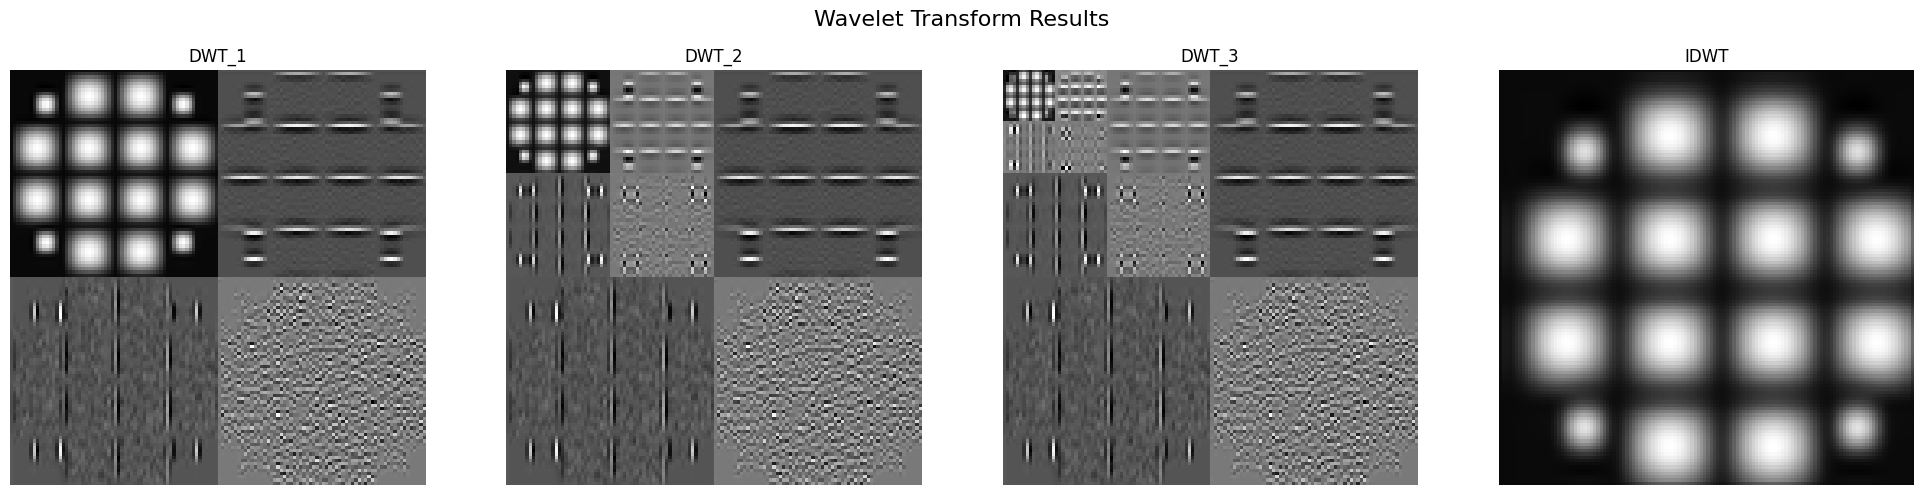

In [2]:
# 画图
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pywt
from function import(
    dwt2d,
    concatenate_image,
    idwt2d,
)

filenames = ['demo-2.tif']

for filename in filenames:
    print(filename)

    image_list = []


    # 读取图像
    input_image = cv2.imread(filename,flags=cv2.IMREAD_GRAYSCALE)  
    (LL0, LH0, HL0, HH0 ) = dwt2d(input_image)
    idwt0 = idwt2d(LL0, LH0, HL0, HH0)
    (LL1, LH1, HL1, HH1 ) = dwt2d(LL0)
    (LL2, LH2, HL2, HH2 ) = dwt2d(LL1)

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 2行2列的子图
    
    for i in range(3):
        (LL, LH, HL, HH ) = dwt2d(input_image)
        if i == 0:           
            dwt1 = concatenate_image(LL0, LH0, HL0, HH0 )
        if i == 1:
            dwt2 = concatenate_image(LL1, LH1, HL1, HH1)
            dwt1 = concatenate_image(dwt2, LH0, HL0, HH0)
        if i == 2:
            dwt3 = concatenate_image(LL2, LH2, HL2, HH2)
            dwt2 = concatenate_image(dwt3, LH1, HL1, HH1)
            dwt1 = concatenate_image(dwt2, LH0, HL0, HH0)
        # 显示为灰度图
        axes[i].imshow(dwt1, cmap='gray')
        axes[i].set_title(f'DWT_{i+1}'), plt.xticks([]), plt.yticks([])
        axes[i].axis('off')  # 关闭坐标轴


    idwt2 = idwt2d(LL1, LH1, HL1, HH1)
    idwt1 = idwt2d(idwt2, LH0, HL0, HH0)
        # 显示为灰度图
    axes[3].imshow(idwt1, cmap='gray')
    axes[3].set_title('IDWT')
    axes[3].axis('off')  # 关闭坐标轴
    # 设置主标题
    plt.suptitle('Wavelet Transform Results', fontsize=16)

    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 调整子图间距，给主标题留点空间

    # 保存图像
    plt.savefig(f'result/{filename}_Wavelet_Transform_Results.jpg')

    # 显示图像
    plt.show()

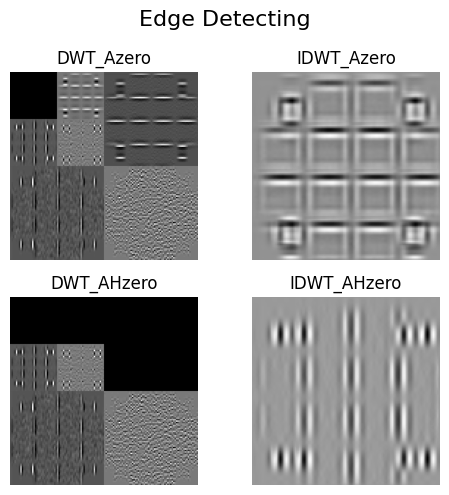

In [3]:
LL0_0 = np.zeros(shape=LH0.shape, dtype=float)  
LL1_0 = np.zeros(shape=LH1.shape, dtype=float)

LH0_0 = np.zeros(shape=LH0.shape, dtype=float)
LH1_0 = np.zeros(shape=LH1.shape, dtype=float)

dwt2_Azero = concatenate_image(LL1_0, LH1, HL1, HH1)
dwt1_Azero =concatenate_image(dwt2_Azero, LH0, HL0, HH0)

dwt2_AHzero = concatenate_image(LL1_0, LH1_0, HL1, HH1)
dwt1_AHzero = concatenate_image(dwt2_AHzero, LH0_0, HL0, HH0)

idwt2_Azero = idwt2d(LL1_0, LH1, HL1, HH1)
idwt2_AHzero = idwt2d(LL1_0, LH1_0, HL1, HH1)

idwt1_Azero = idwt2d(idwt2_Azero, LH0, HL0, HH0)
idwt1_AHzero = idwt2d(idwt2_AHzero, LH0_0, HL0, HH0)

# 创建一个包含4个子图的图形
fig, axes = plt.subplots(2, 2, figsize=(5, 5))  # 2行2列的子图
plt.suptitle('Edge Detecting', fontsize=16)
axes[0, 0].imshow(dwt1_Azero, cmap='gray')  # 绘制第1个图像
axes[0, 0].set_title('DWT_Azero')
axes[0, 0].axis('off')  # 关闭坐标轴

axes[0, 1].imshow(idwt1_Azero, cmap='gray')  # 绘制第2个图像
axes[0, 1].set_title('IDWT_Azero')
axes[0, 1].axis('off')  # 关闭坐标轴

axes[1, 0].imshow(dwt1_AHzero, cmap='gray')  # 绘制第3个图像
axes[1, 0].set_title('DWT_AHzero')
axes[1, 0].axis('off')  # 关闭坐标轴

axes[1, 1].imshow(idwt1_AHzero, cmap='gray')  # 绘制第4个图像
axes[1, 1].set_title('IDWT_AHzero')
axes[1, 1].axis('off')  # 关闭坐标轴

# 调整布局
plt.tight_layout()
plt.savefig(f'result/{filename}_Edge_Detecting.jpg')
plt.show()




